In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:

cosine_df = pd.read_csv('../results/cosine_merged.csv')
cosine_df['Augmentation'] = cosine_df['Augmentation'].map(lambda x: x.lstrip('rotate_'))

cosine_df = cosine_df.pivot(index = 'Model', columns='Augmentation', values='cosine distance')
cosine_df.columns = cosine_df.columns.astype(int)
cosine_df = cosine_df.sort_index(axis=1)


In [3]:
m_knn_df = pd.read_csv('../results/m_knn_merged.csv')
m_knn_df = m_knn_df.drop(['std mNN Similarity'], axis=1)
m_knn_df['Augmentation'] = m_knn_df['Augmentation'].map(lambda x: x.lstrip('rotate_'))
#
m_knn_df = m_knn_df.pivot(index = 'Model', columns='Augmentation', values='mean mNN Similarity')
m_knn_df.columns = m_knn_df.columns.astype(int)
m_knn_df = m_knn_df.sort_index(axis=1)



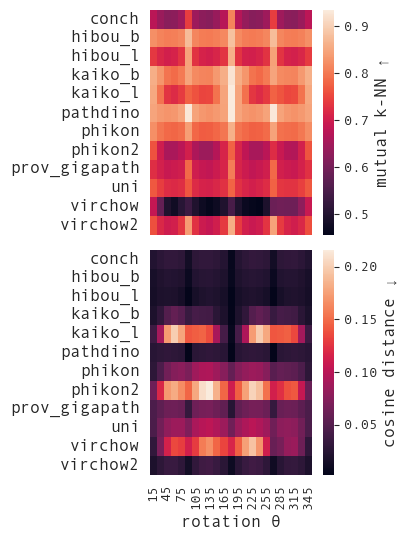

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(4,5.5))

heatmap1 = sns.heatmap(m_knn_df,
            ax=axs[0],
            # cbar_kws = {"shrink": 0.8, "aspect": 10, 'family':'Andale Mono'}
            )
heatmap2 = sns.heatmap(cosine_df,
            ax=axs[1],
            # cbar_kws = {"shrink": 0.8, "aspect": 10, 'family':'Andale Mono'}
            )

axs[0].set_yticklabels(axs[1].get_yticklabels(), fontsize=12, family='Andale Mono',)
# axs[0].set_xticklabels([])  # Remove y-axis labels for subplot 0
axs[0].set_xticks([])
axs[0].set(xlabel=None)
axs[0].set(ylabel=None)


axs[1].set_xticklabels(axs[1].get_xticklabels(), fontsize=10, family='Andale Mono')
axs[1].set_yticklabels(axs[1].get_yticklabels(), fontsize=12, family='Andale Mono')
axs[1].set_xlabel('rotation θ', fontsize=12, family='Andale Mono')
axs[1].set(ylabel=None)


cbar1 = heatmap1.collections[0].colorbar
cbar2 = heatmap2.collections[0].colorbar

# Set font properties for color bar ticks and labels
for i, cbar in enumerate([cbar1, cbar2]):
    cbar.ax.tick_params(labelsize=10, labelfontfamily='Andale Mono')  # Set tick font size
    cbar.ax.yaxis.label.set_size(12)   # Set label font size
    cbar.ax.yaxis.label.set_family('Andale Mono')  # Set font family for label
    if i == 1:
        cbar.set_label('cosine distance ↓')
    else:
        cbar.set_label('mutual k-NN ↑')

plt.tight_layout()
plt.savefig('rot_heatmap.svg', bbox_inches='tight')